In [67]:
from fastquant import get_stock_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from gaussian_hmm import *
from simple_moving_average import *

In [68]:
f = open("tickers.txt", "r")
tickers = [s.strip('\n') for s in f.readlines()]

In [70]:
def test(ticker):
    print(ticker)
    # getting data
    training_data = get_stock_data(ticker,'2016-05-12','2021-01-01')
    testing_data = get_stock_data(ticker, '2021-01-01', '2021-05-11')
    
    # bulding model
    params = {'n_components': 2, 
      'algorithm': 'map', 
      'n_iter': 100, 
      'd': 5,
      'name':'GHMM'}
    ghmm = GHMM(params=params)
    
    sma_params = {'d': 3, 'name': 'SMA-3'}
    sma = SMA(params=sma_params)
    
    # train pred
    ghmm.train(training_data)
    preds,actual = ghmm.predict(testing_data)
    
    sma.train(training_data)
    preds_sma, actual_sma = sma.predict(testing_data)
    
    # MAPE
    error = ghmm.mean_abs_percent_error(preds,actual)
    print(f'ghmm error: {error}')
    
    sma_error = sma.mean_abs_percent_error(preds_sma, actual_sma)
    print(f'sma error: {sma_error}')
    
    # acc error
    preds_df = pd.DataFrame(preds)
    actual_df = pd.DataFrame(actual)
    pred_change = preds_df.pct_change()
    actual_change = actual_df.pct_change()
    pred_change = list(pred_change.iloc[1:].values.flatten())
    actual_change = list(actual_change.iloc[1:].values.flatten())
    pred_change = list(map(lambda n: n>0, pred_change))
    actual_change = list(map(lambda n: n>0, actual_change))
    acc = [x == y for x,y in zip(pred_change,actual_change)]
    acc = sum(acc)/len(acc)
    print(f'GHMM Trend accuracy: {acc}')
    
    preds_df = pd.DataFrame(preds_sma)
    actual_df = pd.DataFrame(actual_sma)
    pred_change = preds_df.pct_change()
    actual_change = actual_df.pct_change()
    pred_change = list(pred_change.iloc[1:].values.flatten())
    actual_change = list(actual_change.iloc[1:].values.flatten())
    pred_change = list(map(lambda n: n>0, pred_change))
    actual_change = list(map(lambda n: n>0, actual_change))
    acc = [x == y for x,y in zip(pred_change,actual_change)]
    acc = sum(acc)/len(acc)
    print(f'SMA Trend accuracy: {acc}')
    
    # graphing
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(ticker)
    time = range(len(preds))
    ax.plot(time,preds,color='tab:red',marker='s',markersize=2,linestyle='-',linewidth=1,label='ghmm')
    ax.plot(time,actual,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
    ax.plot(time,preds_sma,color='tab:green',marker='s',markersize=2,linestyle='-',linewidth=1,label='sma')
    ax.set_xlabel('time')
    ax.set_ylabel('stock price ($)')
    ax.set_xticks(np.arange(0,len(preds)+10,10))
    ax.set_xlim(0,len(preds)+10)
    ax.xaxis.grid(True,ls='--')
    ax.yaxis.grid(True,ls='--')
    ax.legend()
    plt.show()

AAPL
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DONE8
DONE8
ghmm error: 1.1919812768705538
sma error: 1.8221873552620806
GHMM Trend accuracy: 0.6206896551724138
SMA Trend accuracy: 0.4367816091954023


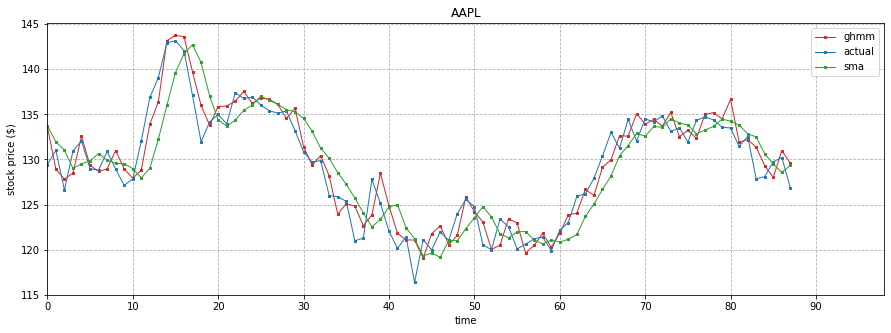

TSLA
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DONE8
DONE8
ghmm error: 2.816769837953149
sma error: 3.518707066288357
GHMM Trend accuracy: 0.5172413793103449
SMA Trend accuracy: 0.5287356321839081


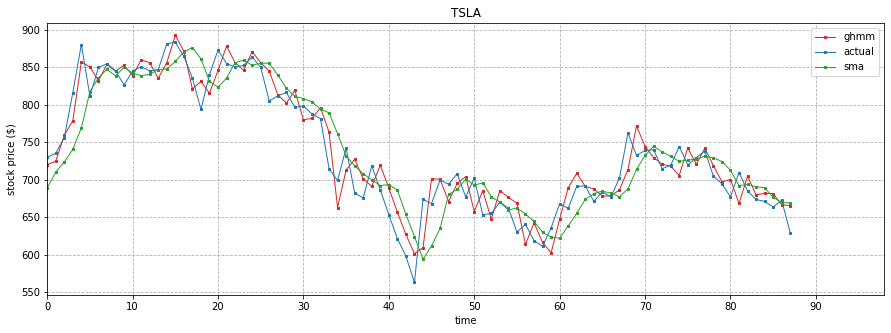

TSM
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DONE8
DONE8
ghmm error: 1.6149749082651523
sma error: 2.4085845480990864
GHMM Trend accuracy: 0.6206896551724138
SMA Trend accuracy: 0.5172413793103449


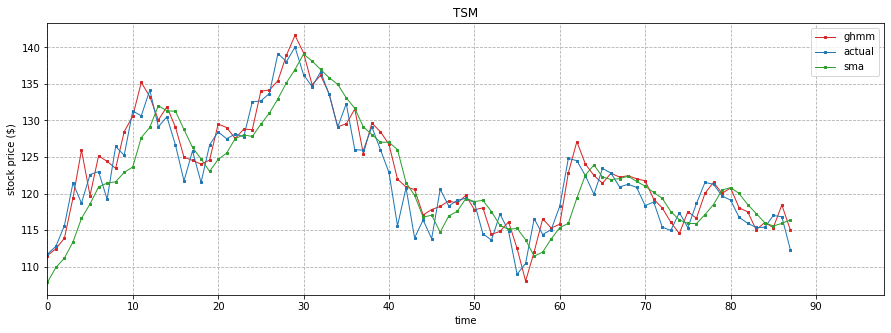

HD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DONE8
DONE8
ghmm error: 0.9224287301114571
sma error: 1.4890841584242338
GHMM Trend accuracy: 0.5632183908045977
SMA Trend accuracy: 0.5517241379310345


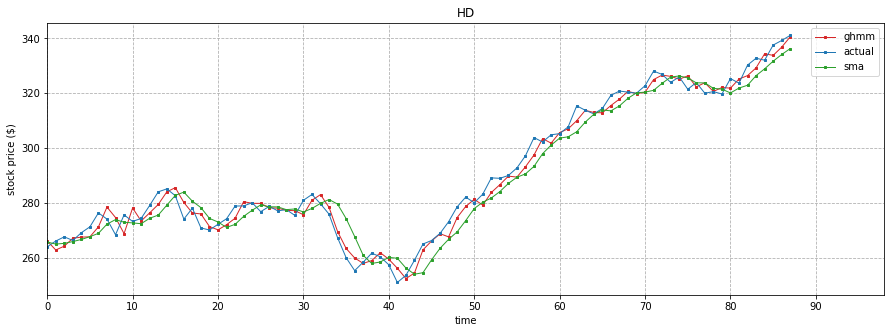

PLUG
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DONE8
DONE8
ghmm error: 4.494193731313162
sma error: 7.252937254770103
GHMM Trend accuracy: 0.5287356321839081
SMA Trend accuracy: 0.5402298850574713


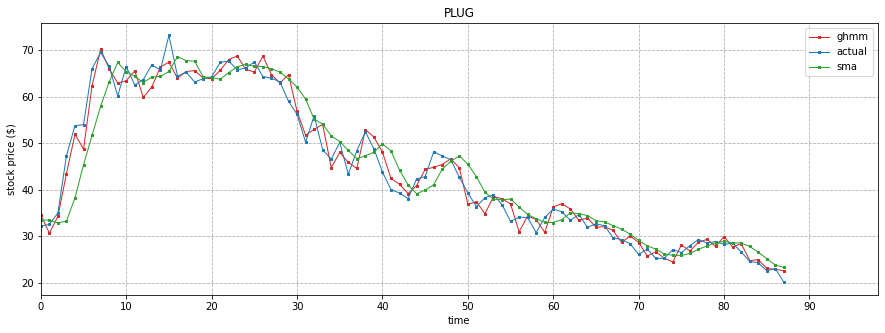

DKNG
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DONE8
DONE8
ghmm error: 2.9872675307157217
sma error: 3.864027596145926
GHMM Trend accuracy: 0.5287356321839081
SMA Trend accuracy: 0.5172413793103449


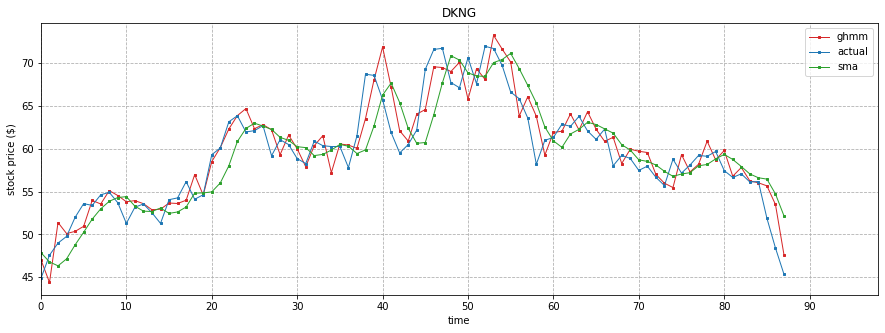

CMCSA
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DONE8
DONE8
ghmm error: 0.9128402123575962
sma error: 1.2245777517603291
GHMM Trend accuracy: 0.5057471264367817
SMA Trend accuracy: 0.4827586206896552


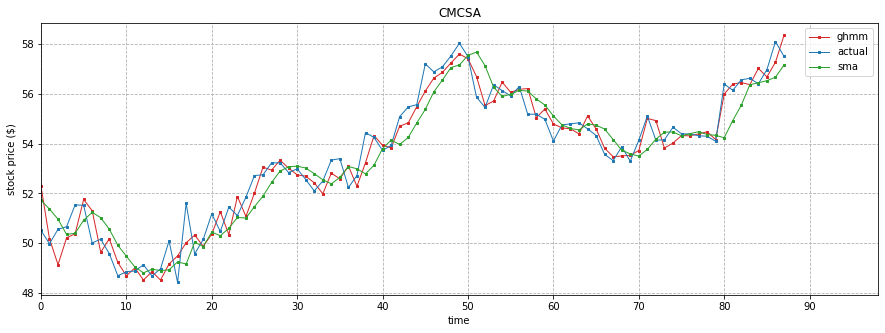

PFE
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DONE8
DONE8
ghmm error: 0.7391515012662235
sma error: 1.0087369647061295
GHMM Trend accuracy: 0.5747126436781609
SMA Trend accuracy: 0.4827586206896552


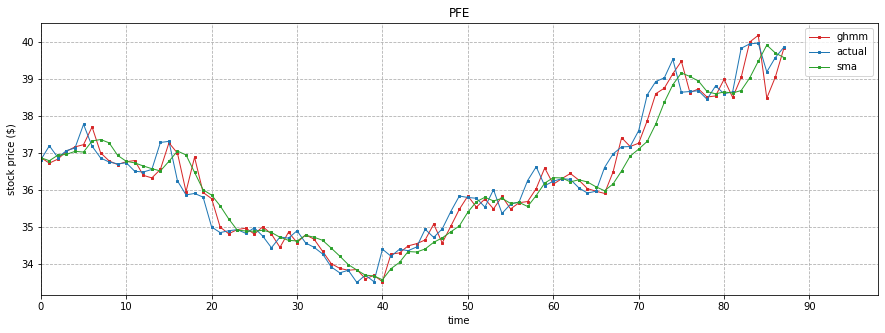

In [69]:
for ticker in tickers:
    test(ticker)

GME
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DONE8
DONE8
ghmm error: 11.143299413815358
sma error: 18.42000613722896
GHMM Trend accuracy: 0.632183908045977
SMA Trend accuracy: 0.5862068965517241


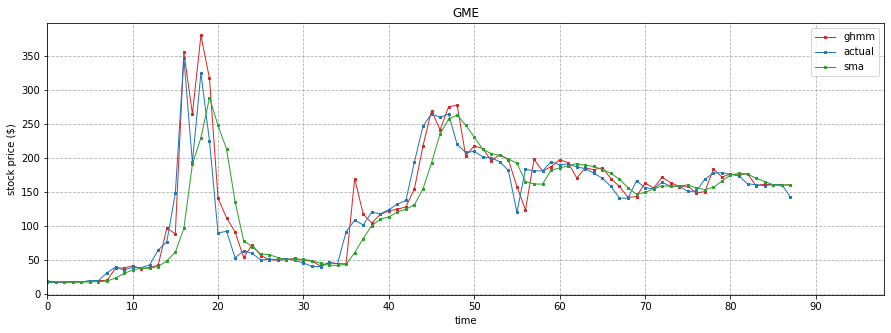

In [71]:
test('GME')

SPY
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DONE8
DONE8
ghmm error: 0.5370830117757057
sma error: 0.8169691264265883
GHMM Trend accuracy: 0.6206896551724138
SMA Trend accuracy: 0.4942528735632184


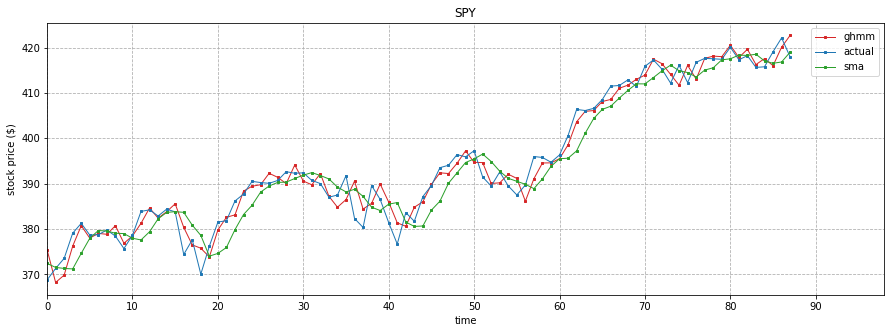

In [72]:
test('SPY')